In [1]:
from src import *

## Table of Contents
- [Emotion item data](#emotion)
    - Reformatting
    - Exploring
- [fMRI data](#fmri)
    - Reformatting
    - Exploring

In [13]:
mri_path = "./data/fmri_compile.csv"
mri_df   = pd.read_csv(mri_path)

Single Video Acquisition

In [16]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

filename_movie = 'TC_400_sub-S09_ses-4_Sintel.csv'
filename_rest  = 'TC_400_sub-S23_ses-1_Rest.csv'

movie_series, movie_df = df_to_timeseries(mri_df, filename_movie)
rest_series, rest_df   = df_to_timeseries(mri_df, filename_rest)

fc_movie = correlation_measure.fit_transform([movie_series])[0]
fc_rest  = correlation_measure.fit_transform([rest_series])[0]

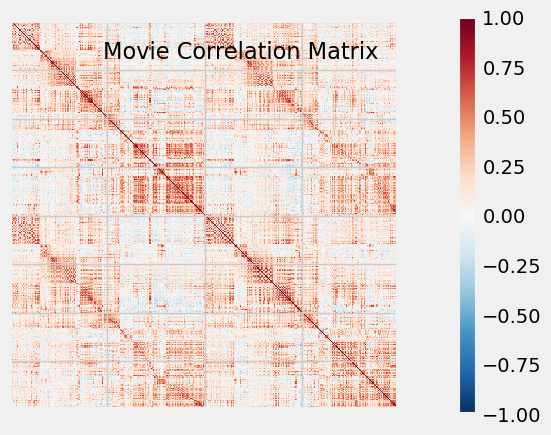

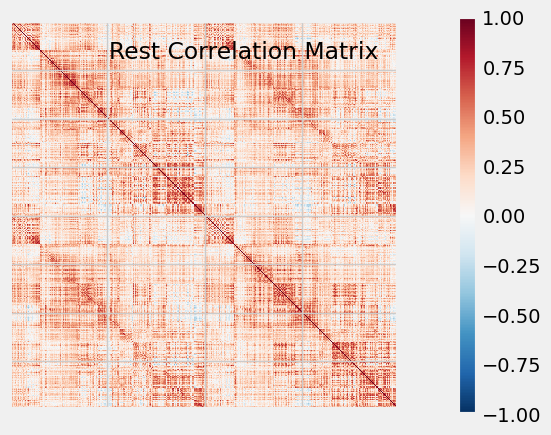

In [119]:
### NOTE: Perhaps do some re-ordering of labels, for now I don't know what to group
# useful for plotting connectivity interactions on glass brain
from nilearn import plotting
plotting.plot_matrix(fc_movie, title="Movie Correlation Matrix", figure=(5,5), vmax=1, vmin=-1)
plotting.plot_matrix(fc_rest, title="Rest Correlation Matrix", figure=(5,5), vmax=1, vmin=-1)

In [123]:
from brainspace.gradient import GradientMaps
g_rest  = GradientMaps(n_components=15, approach='dm', kernel='pearson')
g_rest.fit(fc_rest)

g_movie = GradientMaps(n_components=15, approach='dm', kernel='pearson')
g_movie.fit(fc_movie)

GradientMaps(kernel='pearson', n_components=15)

In [124]:
# # Uncomment for: Sanity Check of Eigenvector explained variances
# plot_eigenvector_importance(g_movie)
# plot_eigenvector_importance(g_rest)

In [125]:
partial_region_movie = { k: movie_df[movie_df.vindex == k]['partial_region'].iloc[0]
                    for k in movie_df['vindex'].unique()}
partial_region_rest  = { k: rest_df[rest_df.vindex == k]['partial_region'].iloc[0]
                    for k in rest_df['vindex'].unique()}                    

In [126]:
palette = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
encode   = { v:i for i,v in enumerate(list(set(partial_region_movie.values())))}
coloring = [palette[encode[partial_region_movie[i]]] for i in range(400)]

In [127]:
{palette[encode[k]]:k for k in encode.keys()}

{'b': 'Default',
 'r': 'Limbic',
 'g': 'Cont',
 'c': 'Vis',
 'm': 'SomMot',
 'y': 'DorsAttn',
 'k': 'SalVentAttn'}

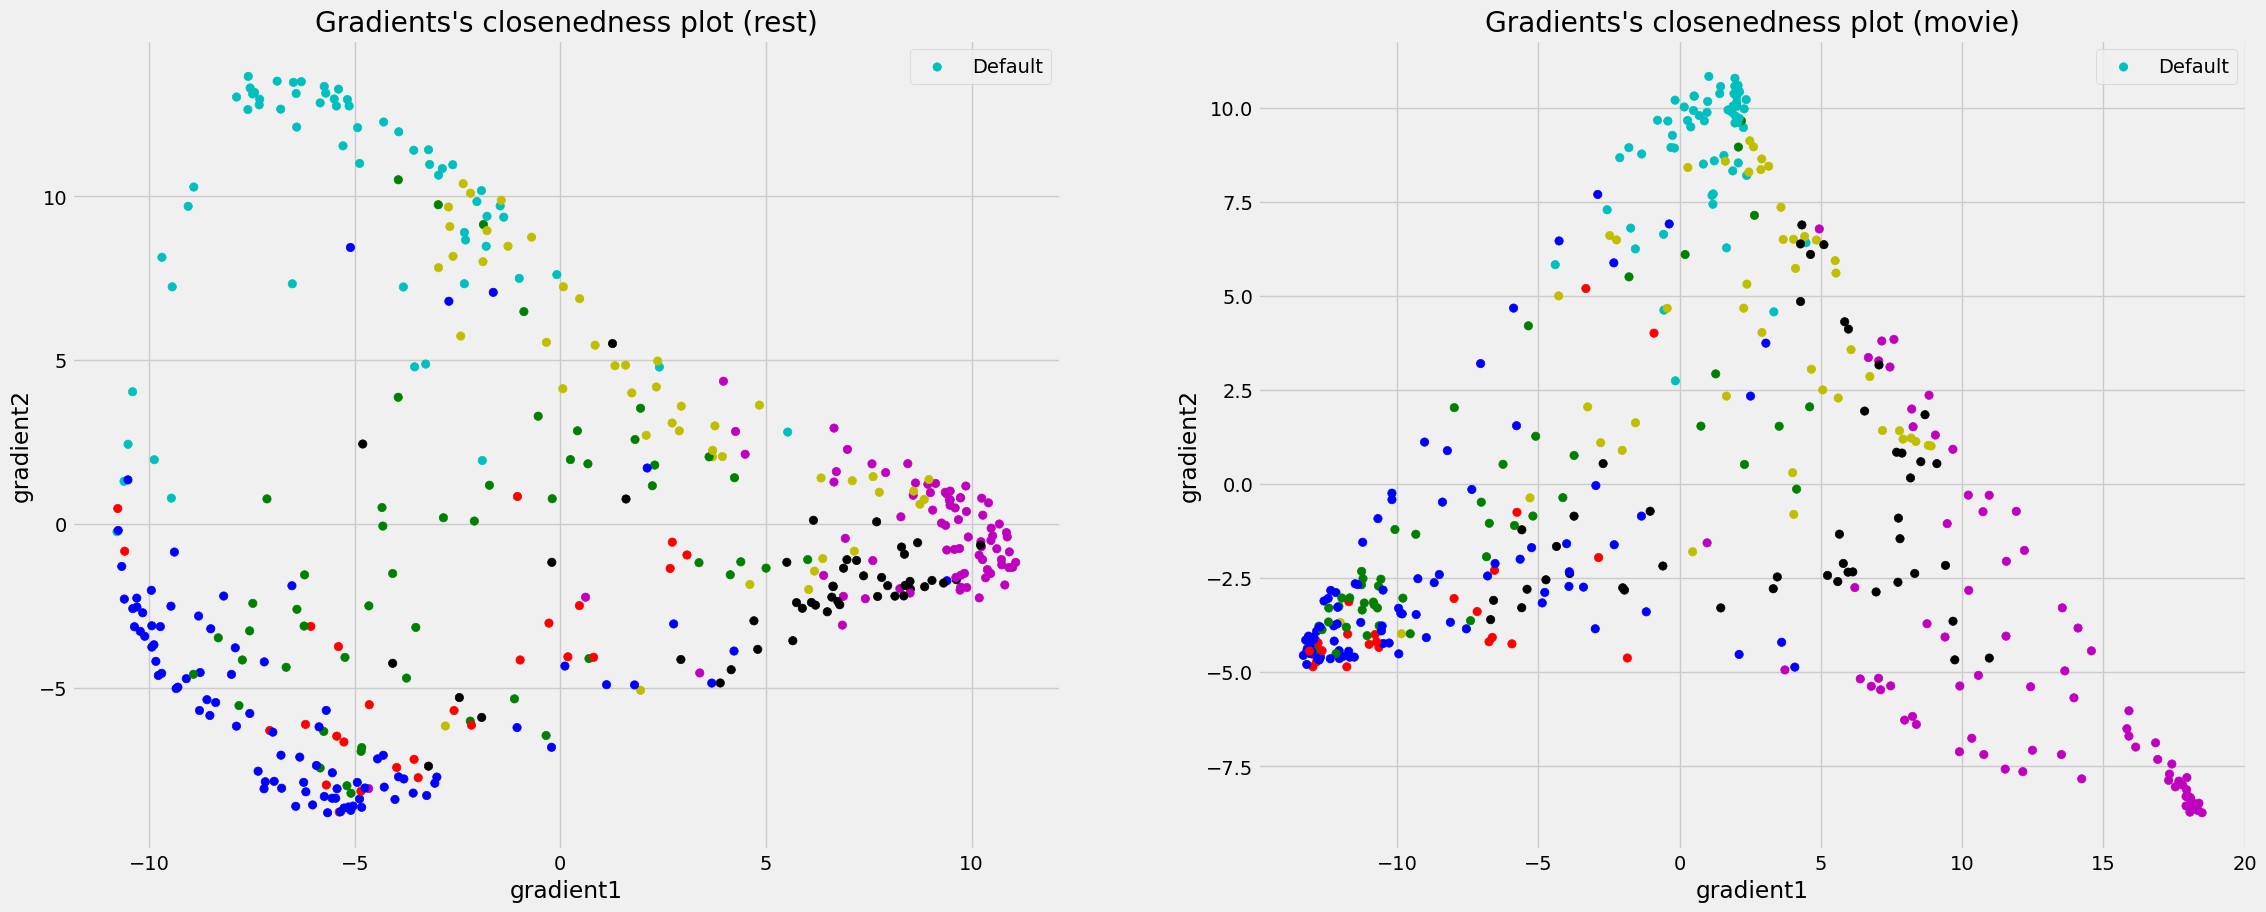

In [134]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

gs = [g_rest, g_movie]
ts = ['rest', 'movie']
for i in range(2):
    
    ax[i].scatter(gs[i].gradients_[:,0], gs[i].gradients_[:,1], color=coloring)

    ax[i].set_title("Gradients's closenedness plot ({})".format(ts[i]))
    ax[i].set_xlabel("gradient1")
    ax[i].set_ylabel("gradient2")
    ax[i].legend(list(encode.keys()))

### Multiple concatenated

In [58]:
movies = [m for m in mri_df.filename.unique() if "Sintel" in m]
rests  = [m for m in mri_df.filename.unique() if "Sintel" not in m]

In [60]:
movie_series = []
rest_series  = []
for m in movies:
    tmp1, _ = df_to_timeseries(mri_df, m)
    movie_series.append(tmp1)
for r in rests:
    tmp2, _ = df_to_timeseries(mri_df, r)
    rest_series.append(tmp2)

In [63]:
movies_series = np.concatenate(movie_series)
rests_series  = np.concatenate(rest_series)

In [70]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

fc_movies = correlation_measure.fit_transform([movies_series])[0]
fc_rests  = correlation_measure.fit_transform([rests_series])[0]

g_rests  = GradientMaps(n_components=15, approach='dm', kernel='pearson')
g_rests.fit(fc_rests)

g_movies = GradientMaps(n_components=15, approach='dm', kernel='pearson')
g_movies.fit(fc_movies)

GradientMaps(kernel='pearson', n_components=15)

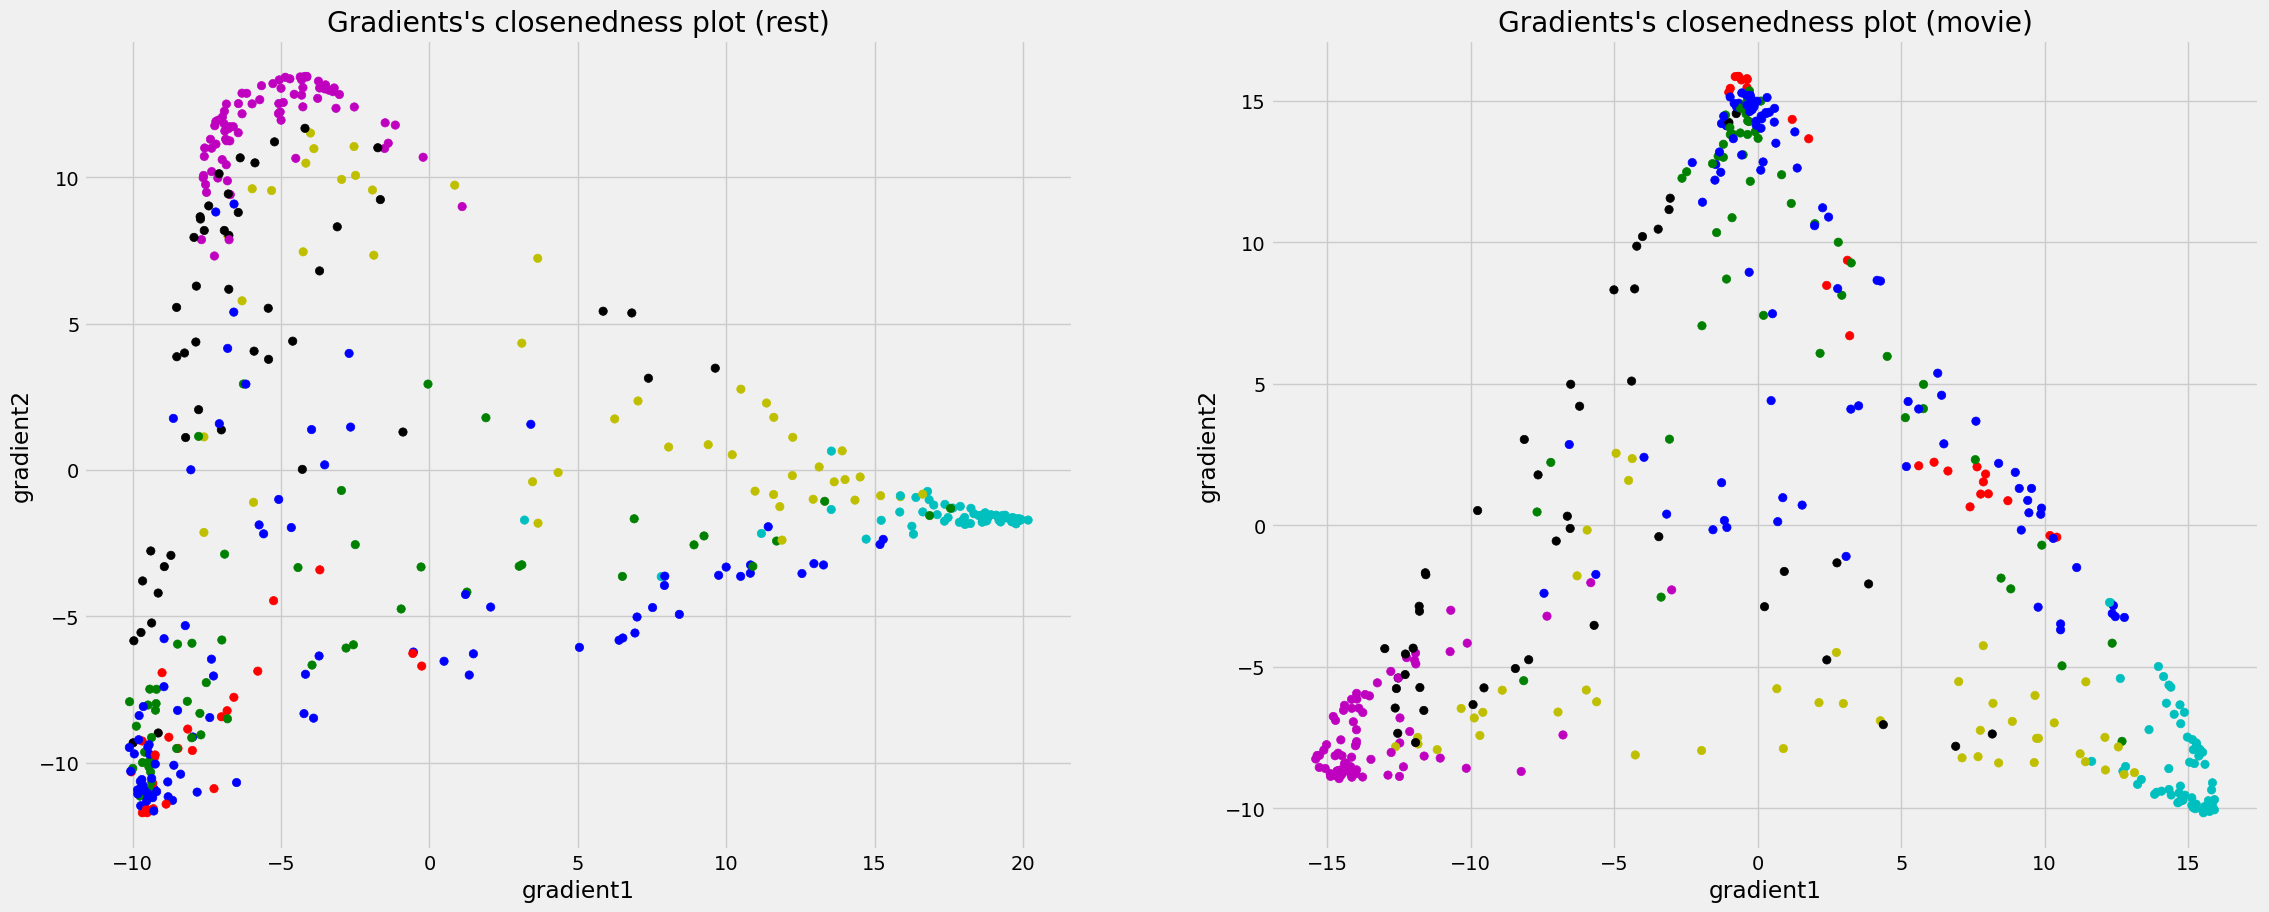

In [75]:
fig, ax = plt.subplots(1,2,figsize=(25,10))

gs = [g_rests, g_movies]
ts = ['rest', 'movie']
for i in range(2):
    
    ax[i].scatter(gs[i].gradients_[:,0], gs[i].gradients_[:,1], color=coloring)

    ax[i].set_title("Gradients's closenedness plot ({})".format(ts[i]))
    ax[i].set_xlabel("gradient1")
    ax[i].set_ylabel("gradient2")